In [1]:
# ✅ Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# ✅ Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


Mounted at /content/drive


In [2]:
# ✅ Load dataset from your specific folder
data = pd.read_csv('/content/drive/My Drive/ProdigyTask-2/customer segmentation/Mall_Customers.csv')

# ✅ Quick check
print(data.head())
print(data.info())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [3]:
# ✅ Correlation matrix
print(data.corr())


ValueError: could not convert string to float: 'Male'

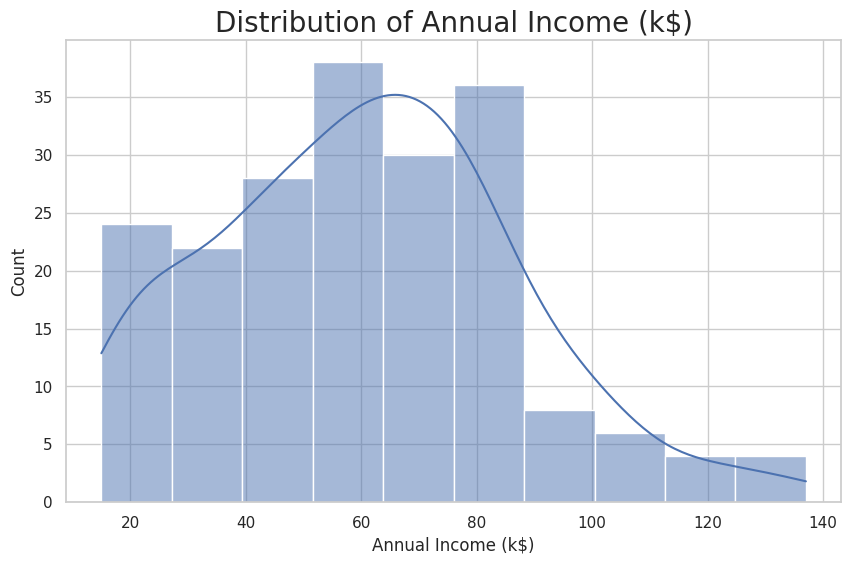

In [4]:
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')
sns.histplot(data['Annual Income (k$)'], kde=True)
plt.title('Distribution of Annual Income (k$)', fontsize=20)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Count')
plt.show()


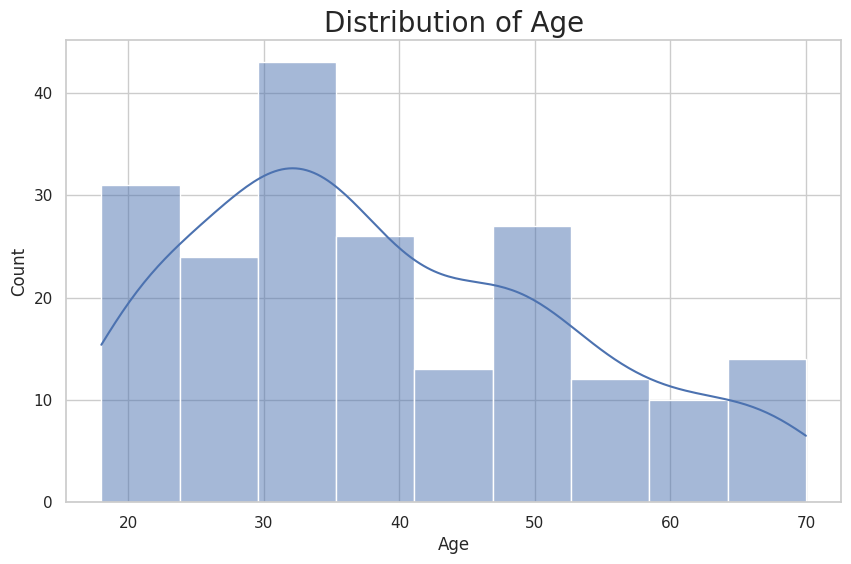

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], kde=True)
plt.title('Distribution of Age', fontsize=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


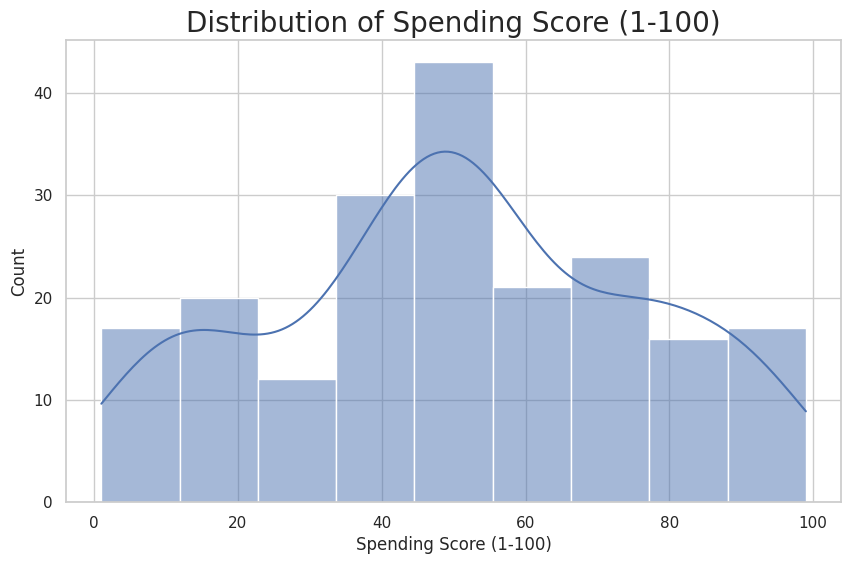

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Spending Score (1-100)'], kde=True)
plt.title('Distribution of Spending Score (1-100)', fontsize=20)
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Count')
plt.show()


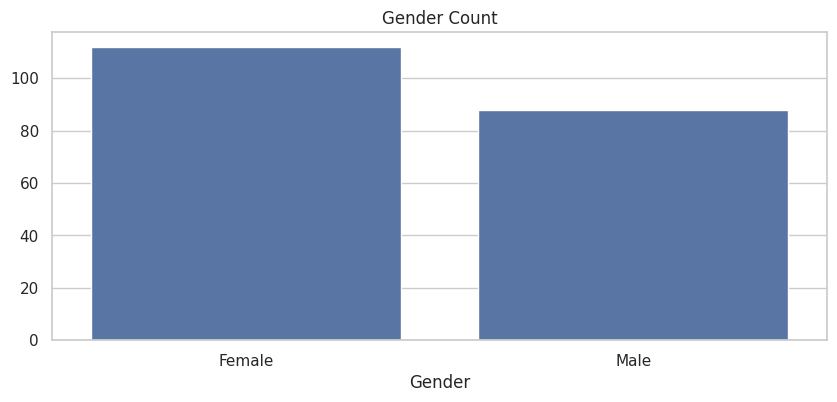

In [7]:
genders = data.Gender.value_counts()
plt.figure(figsize=(10, 4))
sns.barplot(x=genders.index, y=genders.values)
plt.title('Gender Count')
plt.show()


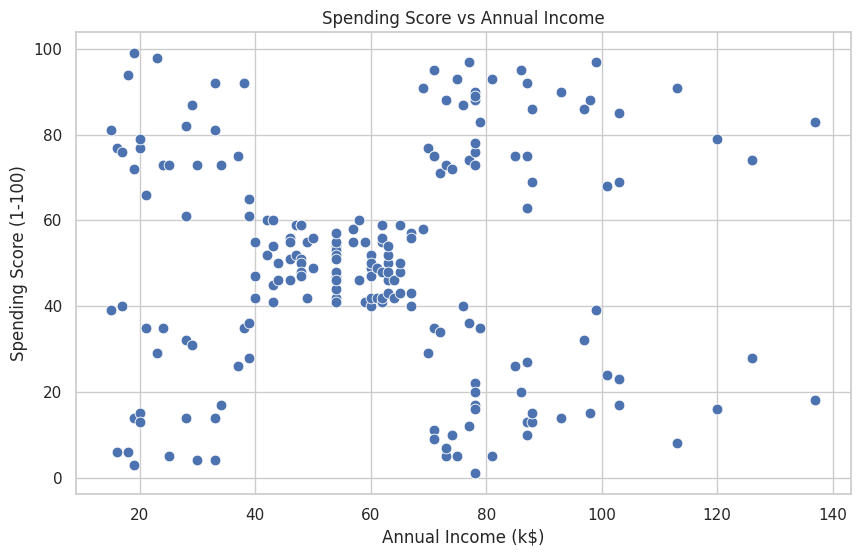

In [8]:
# ✅ Select features
df1 = data[["CustomerID", "Gender", "Age", "Annual Income (k$)", "Spending Score (1-100)"]]
X = df1[["Annual Income (k$)", "Spending Score (1-100)"]]

# ✅ Scatterplot of input data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=X, s=60)
plt.title('Spending Score vs Annual Income')
plt.show()


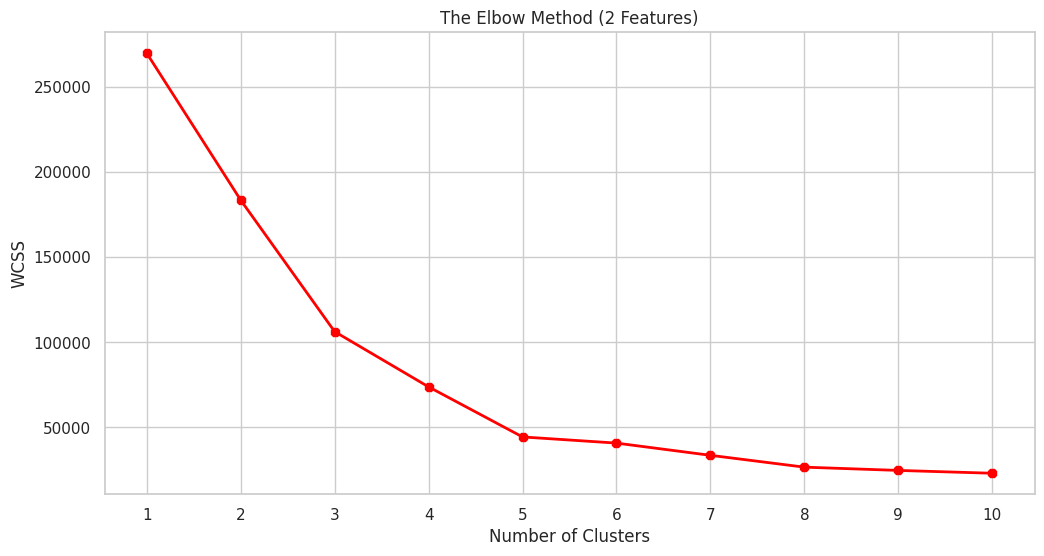

In [9]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init="k-means++", random_state=42)
    km.fit(X)
    wcss.append(km.inertia_)

plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), wcss, marker="8", color="red", linewidth=2)
plt.title("The Elbow Method (2 Features)")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.xticks(np.arange(1, 11, 1))
plt.show()


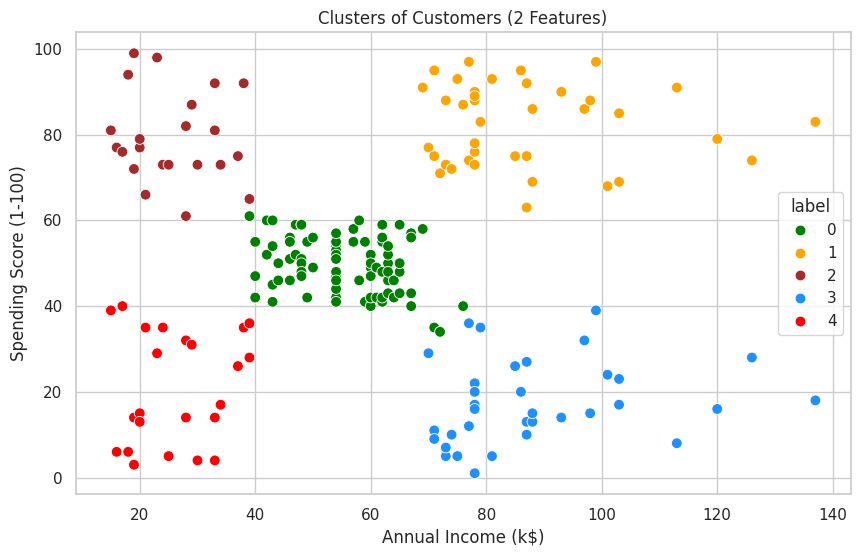

In [10]:
km1 = KMeans(n_clusters=5, init="k-means++", random_state=42)
y1 = km1.fit_predict(X)
df1["label"] = y1

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
                hue="label",
                palette=['green', 'orange', 'brown', 'dodgerblue', 'red'],
                data=df1, s=60)
plt.title('Clusters of Customers (2 Features)')
plt.show()


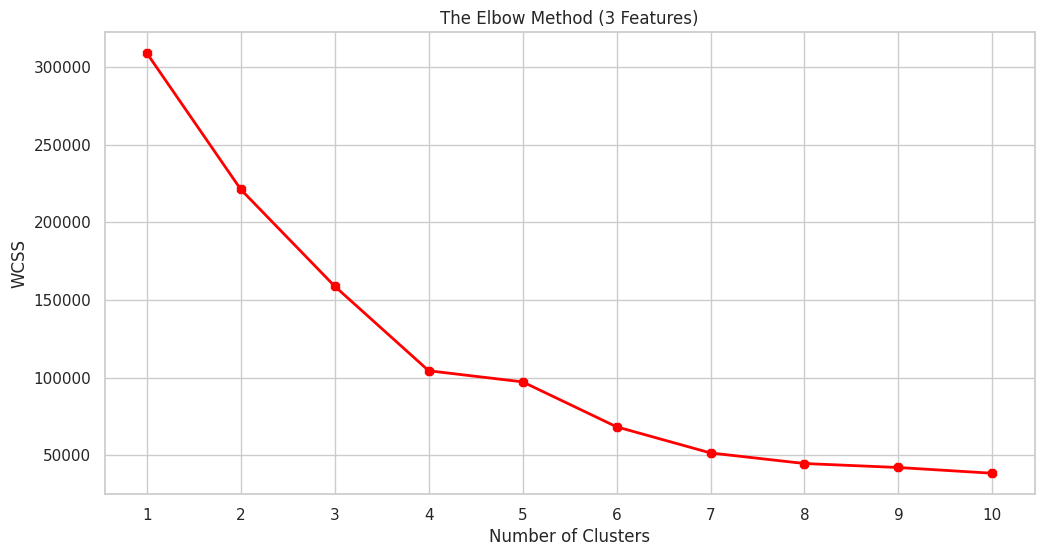

In [11]:
X2 = df1[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init="k-means++", random_state=42)
    km.fit(X2)
    wcss.append(km.inertia_)

plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), wcss, marker="8", color="red", linewidth=2)
plt.title("The Elbow Method (3 Features)")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.xticks(np.arange(1, 11, 1))
plt.show()


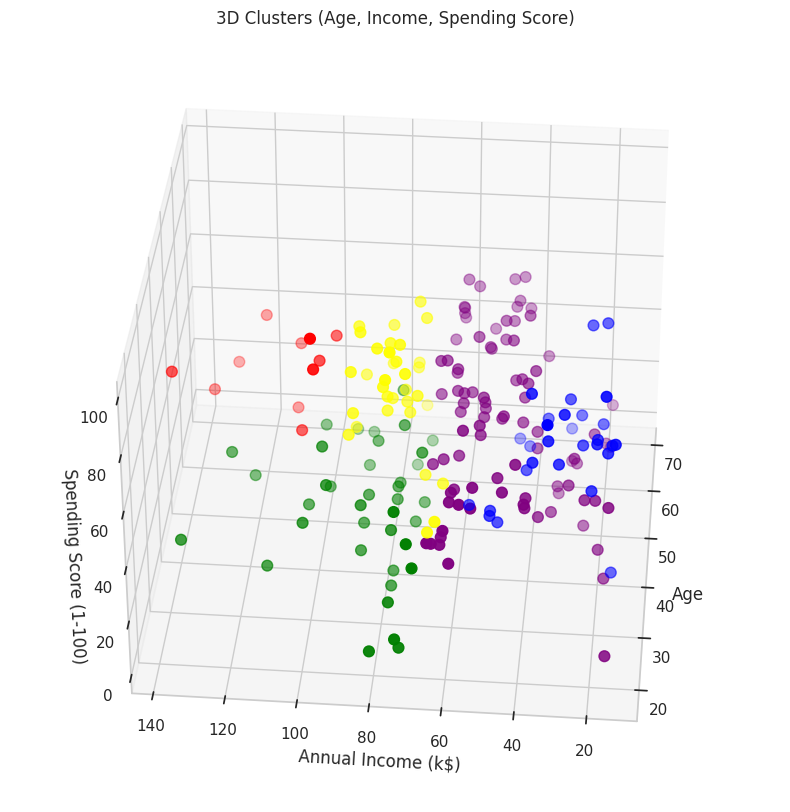

In [12]:
km2 = KMeans(n_clusters=5, init="k-means++", random_state=42)
y2 = km2.fit_predict(X2)
df1["label"] = y2

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')

colors = ['purple', 'red', 'blue', 'green', 'yellow']

for label in range(5):
    ax.scatter(df1.Age[df1.label == label],
               df1["Annual Income (k$)"][df1.label == label],
               df1["Spending Score (1-100)"][df1.label == label],
               c=colors[label],
               s=60)

ax.set_xlabel("Age")
ax.set_ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score (1-100)")
ax.view_init(35, 185)
plt.title('3D Clusters (Age, Income, Spending Score)')
plt.show()


In [13]:
for label in range(5):
    cust_group = df1[df1["label"] == label]
    print(f"Number of customers in group {label+1} = {len(cust_group)}")
    print(f"They are: {cust_group['CustomerID'].values}")
    print("-" * 50)


Number of customers in group 1 = 89
They are: [  3   5   7   9  11  13  15  17  19  21  23  25  27  29  31  33  35  37
  39  41  43  45  47  48  49  50  51  53  54  55  56  57  58  59  60  61
  63  64  65  67  68  70  71  72  73  74  75  76  77  78  79  80  81  82
  83  84  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 105 106 107 108 109 110 111 113 114 115 117 118 119 120 122]
--------------------------------------------------
Number of customers in group 2 = 11
They are: [180 182 184 186 188 190 192 194 196 198 200]
--------------------------------------------------
Number of customers in group 3 = 29
They are: [ 1  2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46
 52 62 66 69 85]
--------------------------------------------------
Number of customers in group 4 = 38
They are: [125 127 129 131 133 135 137 139 141 143 145 147 149 151 153 155 157 159
 161 163 165 167 169 171 173 175 177 179 181 183 185 187 189 191 193 195
 197 199]
---------